<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/sibal/sibal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=bf8237a163b06668233ad5a9e88d7e9316af0d535f04fcd0cd77914fa706855a
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


<ipython-input-15-a302a0ba5c7d>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=============================전체 클러스터 중심값=============================
Cluster 1 Center (RGB): [184.89785344 154.96471749 137.26334403]
Cluster 2 Center (RGB): [223.2450108 192.5650108 175.0799568]
Cluster 3 Center (RGB): [168.87078882 139.33186113 120.8173788 ]
Cluster 4 Center (RGB): [92.96161417 70.08956693 63.93307087]
Cluster 5 Center (RGB): [211.7552354  181.06462568 163.09549781]
Cluster 6 Center (RGB): [146.89969462 116.95795161 102.32746065]
Cluster 7 Center (RGB): [233.9567414  204.68555941 191.5389959 ]
Cluster 8 Center (RGB): [199.12120623 168.40415045 150.52652399]
=============================전체 클러스터 픽셀수=============================
Cluster 2 Size: 23150 pixels
Cluster 7 Size: 19002 pixels
Cluster 5 Size: 19517 pixels
Cluster 8 Size: 15338 pixels
Cluster 1 Size: 12159 pixels
Cluster 3 Size: 9739 pixels
Cluster 6 Size: 4254 pixels
Cluster 4 Size: 1016 pixels
전체 픽셀 수: 104175
=============================Color distance계산=============================
가장 픽셀 수가 많은 클러스터: 2
첫 번째로 

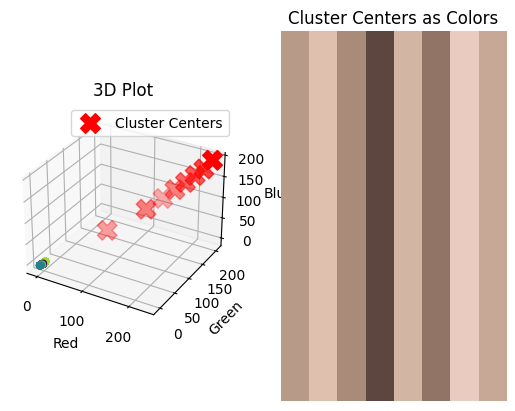

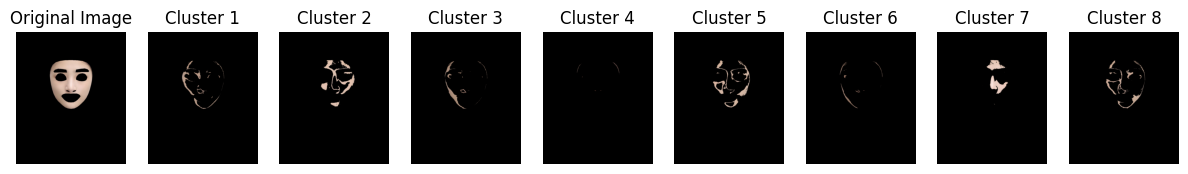

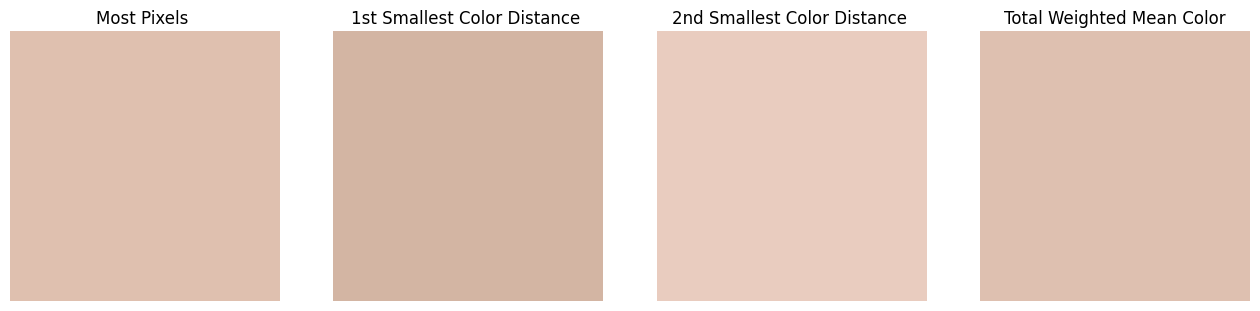

=============================변환=============================
평균 RGB 값: [222.90166859 192.65133211 176.34985163]
Lab: L=80.07150103478584, a=8.196299678288943, b=12.165349403925463
HSV: H=21.010755175205304, S=0.20884463204643244, V=0.8741241905314235
=============================LbS=============================
 L=80.07150103478584, b=12.165349403925463, S=0.20884463204643244
이미지 저장경로: /content/cluster_images


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from collections import Counter
import imageio

from collections import Counter
from colormath.color_objects import sRGBColor, LabColor, HSVColor
from colormath.color_conversions import convert_color
import os

# 이미지 로드
image_path = "/content/minzi.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

print(f'=============================전체 클러스터 중심값=============================')
for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

print(f'=============================전체 클러스터 픽셀수=============================')

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 첫 번째로 Color distance가 작은 클러스터 찾기
min_distance_1 = float('inf')
selected_cluster_1 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # 가장 픽셀 수가 많은 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# 두 번째로 Color distance가 작은 클러스터 찾기
min_distance_2 = float('inf')
selected_cluster_2 = None

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # 가장 픽셀 수가 많은 클러스터와 첫 번째로 선택된 클러스터는 제외
        current_distance = distance.euclidean(cluster_centers_rgb[most_pixels_cluster], center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# 각 클러스터에 속하는 픽셀의 수를 RGB값에 곱한 뒤, 세 개의 클러스터의 픽셀 수로 나누어 평균 RGB 값을 계산
most_pixels_cluster_size = cluster_sizes[most_pixels_cluster]
selected_cluster_1_size = cluster_sizes[selected_cluster_1]
selected_cluster_2_size = cluster_sizes[selected_cluster_2]

most_pixels_rgb_sum = np.sum(face_data[optimal_cluster_labels == most_pixels_cluster], axis=0)
selected_cluster_1_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_1], axis=0)
selected_cluster_2_rgb_sum = np.sum(face_data[optimal_cluster_labels == selected_cluster_2], axis=0)

most_pixels_rgb_mean_weighted = most_pixels_rgb_sum / most_pixels_cluster_size
selected_cluster_1_rgb_mean_weighted = selected_cluster_1_rgb_sum / selected_cluster_1_size
selected_cluster_2_rgb_mean_weighted = selected_cluster_2_rgb_sum / selected_cluster_2_size

total_rgb_sum_weighted = (most_pixels_rgb_sum + selected_cluster_1_rgb_sum + selected_cluster_2_rgb_sum)
total_rgb_mean_weighted = total_rgb_sum_weighted / (most_pixels_cluster_size + selected_cluster_1_size + selected_cluster_2_size)

print(f'=============================Color distance계산=============================')

# 결과 출력
print(f'가장 픽셀 수가 많은 클러스터: {most_pixels_cluster + 1}')
print(f'첫 번째로 Color distance가 작은 클러스터: {selected_cluster_1 + 1}')
print(f'두 번째로 Color distance가 작은 클러스터: {selected_cluster_2 + 1}')
print(f'첫 번째 Color distance: {min_distance_1}')
print(f'두 번째 Color distance: {min_distance_2}')

print(f'=============================가중평균=============================')
print(f'가장 픽셀 수가 많은 클러스터의 가중 평균 RGB 값: {most_pixels_rgb_mean_weighted}')
print(f'첫 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_1_rgb_mean_weighted}')
print(f'두 번째로 Color distance가 작은 클러스터의 가중 평균 RGB 값: {selected_cluster_2_rgb_mean_weighted}')
print(f'세개의 클러스터의 가중 평균 RGB 값: {total_rgb_mean_weighted}')


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')



# 결과 색상 출력
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(most_pixels_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[0].set_title('Most Pixels ')
ax[0].axis('off')

ax[1].imshow(selected_cluster_1_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[1].set_title('1st Smallest Color Distance ')
ax[1].axis('off')

ax[2].imshow(selected_cluster_2_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[2].set_title('2nd Smallest Color Distance ')
ax[2].axis('off')

ax[3].imshow(total_rgb_mean_weighted.reshape((1, 1, 3)) / 255)
ax[3].set_title('Total Weighted Mean Color')
ax[3].axis('off')

plt.show()


print(f'=============================변환=============================')
# 평균 RGB 값 출력
print(f'평균 RGB 값: {total_rgb_mean_weighted}')

# RGB to Lab conversion
average_srgb = sRGBColor(total_rgb_mean_weighted[0], total_rgb_mean_weighted[1], total_rgb_mean_weighted[2], is_upscaled=True)
average_lab = convert_color(average_srgb, LabColor)

# 출력 Lab 값
print(f'Lab: L={average_lab.lab_l}, a={average_lab.lab_a}, b={average_lab.lab_b}')

# RGB to HSV conversion
average_hsv = convert_color(average_srgb, HSVColor)

# 출력 HSV 값
# s, v값은 비율입니당~
print(f'HSV: H={average_hsv.hsv_h}, S={average_hsv.hsv_s}, V={average_hsv.hsv_v}')

# L, b, S값 출력
print(f'=============================LbS=============================')
print(f' L={average_lab.lab_l}, b={average_lab.lab_b}, S={average_hsv.hsv_s}')



#교수님스미마셍
#출력결과 클러스터순서대로네요






#영역이미지 저장코드추가

# 이미지를 저장할 디렉토리
output_directory = "/content/cluster_images"
os.makedirs(output_directory, exist_ok=True)

# 클러스터 이미지 및 Total Weighted Mean Color 이미지 저장
for i, cluster_indices in enumerate([most_pixels_cluster, selected_cluster_1, selected_cluster_2]):
    cluster_pixels = face_data[optimal_cluster_labels == cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[optimal_cluster_labels == cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    # 이미지 저장
    cluster_filename = os.path.join(output_directory, f'cluster_{i + 1}.png')
    imageio.imwrite(cluster_filename, result_image)

# Total Weighted Mean Color 이미지 저장
total_weighted_mean_color_image = np.zeros((50, 50, 3), dtype=np.uint8)
total_weighted_mean_color_image[:, :] = total_rgb_mean_weighted.astype(np.uint8)
total_weighted_mean_color_filename = os.path.join(output_directory, 'total_weighted_mean_color.png')
imageio.imwrite(total_weighted_mean_color_filename, total_weighted_mean_color_image)

# 메시지 출력
print(f'이미지 저장경로: {output_directory}')


In [16]:
import numpy as np

# 주어진 타입의 RGB 값들
spring_type_rgb = np.array([
    (251, 211, 168), (255, 202, 149),
    (253, 197, 161), (252, 204, 130)
])

summer_type_rgb = np.array([
    (253, 231, 174), (255, 219, 192),
    (254, 217, 170), (254, 210, 122)
])

fall_type_rgb = np.array([
    (255, 221, 150), (247, 206, 152),
    (249, 201, 128), (212, 169, 101)
])

winter_type_rgb = np.array([
    (255, 220, 147), (242, 206, 148),
    (247, 207, 121), (216, 173, 102)
])

# 주어진 타입과 total_rgb_mean_weighted 간의 거리 계산 함수
def calculate_distance(type_rgb, target_rgb):
    return np.mean(np.linalg.norm(type_rgb - target_rgb, axis=1))

# 새로운 타입별 거리 계산
spring_light_distance = calculate_distance(np.array([spring_type_rgb[0], spring_type_rgb[1]]), total_rgb_mean_weighted)
spring_clear_distance = calculate_distance(np.array([spring_type_rgb[2], spring_type_rgb[3]]), total_rgb_mean_weighted)

summer_light_distance = calculate_distance(np.array([summer_type_rgb[0], summer_type_rgb[1]]), total_rgb_mean_weighted)
summer_mute_distance = calculate_distance(np.array([summer_type_rgb[2], summer_type_rgb[3]]), total_rgb_mean_weighted)

fall_deep_distance = calculate_distance(np.array([fall_type_rgb[0], fall_type_rgb[1]]), total_rgb_mean_weighted)
fall_mute_distance = calculate_distance(np.array([fall_type_rgb[2], fall_type_rgb[3]]), total_rgb_mean_weighted)

winter_clear_distance = calculate_distance(np.array([winter_type_rgb[0], winter_type_rgb[1]]), total_rgb_mean_weighted)
winter_deep_distance = calculate_distance(np.array([winter_type_rgb[2], winter_type_rgb[3]]), total_rgb_mean_weighted)

# 거리를 토대로 정렬
distances = [
    ("봄 Light", spring_light_distance),
    ("봄 Clear", spring_clear_distance),
    ("여름 Light", summer_light_distance),
    ("여름 Mute", summer_mute_distance),
    ("가을 Deep", fall_deep_distance),
    ("가을 Mute", fall_mute_distance),
    ("겨울 Clear", winter_clear_distance),
    ("겨울 Deep", winter_deep_distance)
]

distances.sort(key=lambda x: x[1])

# 결과 출력
print(f'가장 가까운 타입: {distances[0][0]}')
print(f'두 번째로 가까운 타입: {distances[1][0]}')


가장 가까운 타입: 봄 Light
두 번째로 가까운 타입: 가을 Deep


In [5]:
# 주어진 타입의 RGB 값들
spring_type_rgb = np.array([
    (251, 211, 168), (255, 202, 149),
    (253, 197, 161), (252, 204, 130)
])

summer_type_rgb = np.array([
    (253, 231, 174), (255, 219, 192),
    (254, 217, 170), (254, 210, 122)
])

fall_type_rgb = np.array([
    (255, 221, 150), (247, 206, 152),
    (249, 201, 128), (212, 169, 101)
])

winter_type_rgb = np.array([
    (255, 220, 147), (242, 206, 148),
    (247, 207, 121), (216, 173, 102)
])

# 주어진 타입과 total_rgb_mean_weighted 간의 거리 계산 함수
def calculate_distance(type_rgb, target_rgb):
    return np.mean(np.linalg.norm(type_rgb - target_rgb, axis=1))

# 타입별 거리 계산
spring_distance = calculate_distance(spring_type_rgb, total_rgb_mean_weighted)
summer_distance = calculate_distance(summer_type_rgb, total_rgb_mean_weighted)
fall_distance = calculate_distance(fall_type_rgb, total_rgb_mean_weighted)
winter_distance = calculate_distance(winter_type_rgb, total_rgb_mean_weighted)

# 최소 거리를 가진 타입 찾기
min_distance_type = min(
    [("봄", spring_distance), ("여름", summer_distance), ("가을", fall_distance), ("겨울", winter_distance)],
    key=lambda x: x[1]
)

# 결과 출력
print(f'Total Weighted Mean Color가 가장 가까운 타입: {min_distance_type[0]}')


Total Weighted Mean Color가 가장 가까운 타입: 여름


<ipython-input-5-680261d48414>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [184.89785344 154.96471749 137.26334403]
Cluster 2 Center (RGB): [223.2450108 192.5650108 175.0799568]
Cluster 3 Center (RGB): [168.87078882 139.33186113 120.8173788 ]
Cluster 4 Center (RGB): [92.96161417 70.08956693 63.93307087]
Cluster 5 Center (RGB): [211.7552354  181.06462568 163.09549781]
Cluster 6 Center (RGB): [146.89969462 116.95795161 102.32746065]
Cluster 7 Center (RGB): [233.9567414  204.68555941 191.5389959 ]
Cluster 8 Center (RGB): [199.12120623 168.40415045 150.52652399]
Cluster 2 Size: 23150 pixels
Cluster 7 Size: 19002 pixels
Cluster 5 Size: 19517 pixels
Cluster 8 Size: 15338 pixels
Cluster 1 Size: 12159 pixels
Cluster 3 Size: 9739 pixels
Cluster 6 Size: 4254 pixels
Cluster 4 Size: 1016 pixels
전체 픽셀 수: 104175


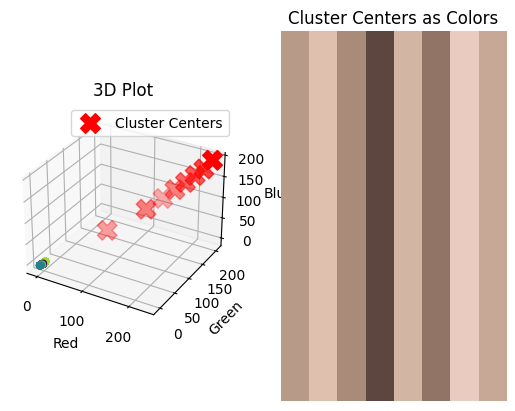

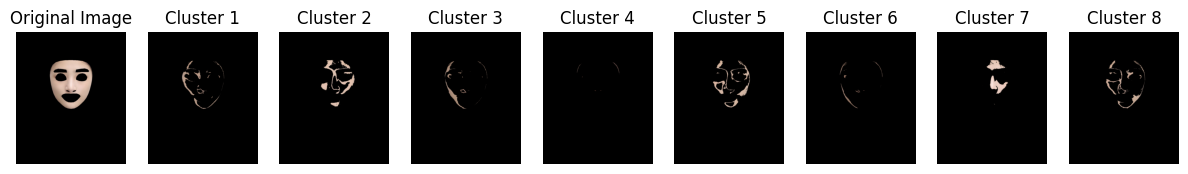

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import imageio

# 이미지 로드
image_path = "/content/minzi.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 8
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')

plt.show()




In [ ]:
from scipy.spatial import distance

# 가장 픽셀 수가 많은 클러스터 찾기
most_pixels_cluster = max(cluster_sizes, key=cluster_sizes.get)

# 가장 픽셀 수가 많은 클러스터의 RGB 중심값
most_pixels_cluster_center = cluster_centers_rgb[most_pixels_cluster]

# Initialize variables
min_distance_1 = float('inf')
selected_cluster_1 = None
min_distance_2 = float('inf')
selected_cluster_2 = None

# Find the two clusters with the smallest color distances
for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster:  # Exclude the cluster with the most pixels
        current_distance = distance.euclidean(most_pixels_cluster_center, center)
        if current_distance < min_distance_1:
            min_distance_1, selected_cluster_1 = current_distance, i

# Reset for the second iteration
min_distance_2 = float('inf')

for i, center in enumerate(cluster_centers_rgb):
    if i != most_pixels_cluster and i != selected_cluster_1:  # Exclude the cluster with the most pixels and the first selected cluster
        current_distance = distance.euclidean(most_pixels_cluster_center, center)
        if current_distance < min_distance_2:
            min_distance_2, selected_cluster_2 = current_distance, i

# Output the results
print(f'Cluster with the most pixels: {most_pixels_cluster + 1}')
print(f'First cluster with the smallest color distance: {selected_cluster_1 + 1}')
print(f'Second cluster with the smallest color distance: {selected_cluster_2 + 1}')
print(f'Color distance for the first cluster: {min_distance_1}')
print(f'Color distance for the second cluster: {min_distance_2}')


Cluster with the most pixels: 1
First cluster with the smallest color distance: 5
Second cluster with the smallest color distance: 3
Color distance for the first cluster: 23.750597163854877
Color distance for the second cluster: 56.763279863034036


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



<ipython-input-5-bd3bbefed738>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548
평균 RGB 값: [216.54465707 193.82549081 187.7632949 ]


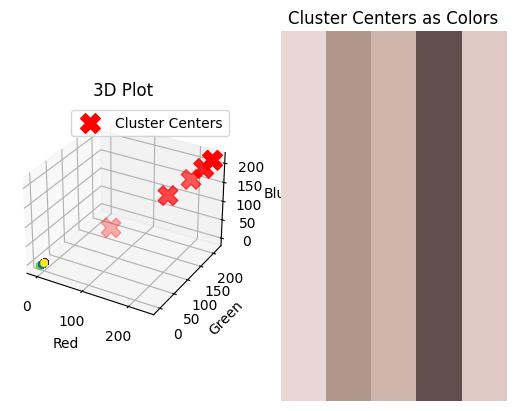

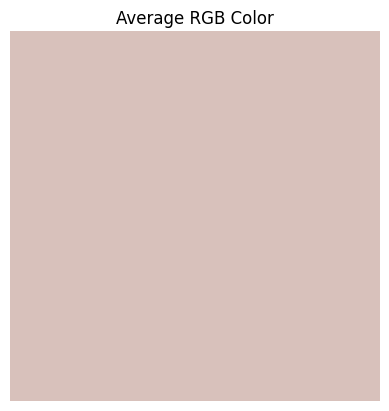

In [ ]:
# 가중평균계산 기존.ver
from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 각 클러스터에 속하는 픽셀 수와 중심값(RGB)의 가중 평균 계산
weighted_sum = np.zeros(3)  # 초기화: R, G, B의 가중 합
for i in range(optimal_k):
    cluster_size = cluster_sizes[i]
    cluster_center_rgb = cluster_centers_rgb[i]
    weighted_sum += cluster_center_rgb * cluster_size

# 평균 RGB 계산
average_rgb = weighted_sum / total_pixels

# 출력
print(f'평균 RGB 값: {average_rgb}')

# 평균 RGB 값을 사용하여 이미지 생성
average_rgb_image = np.full((100, 100, 3), average_rgb, dtype=np.uint8)


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()

# 이미지 표시
plt.imshow(average_rgb_image)
plt.axis('off')
plt.title('Average RGB Color')
plt.show()

# color distance
# z-score
# 정규화


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548


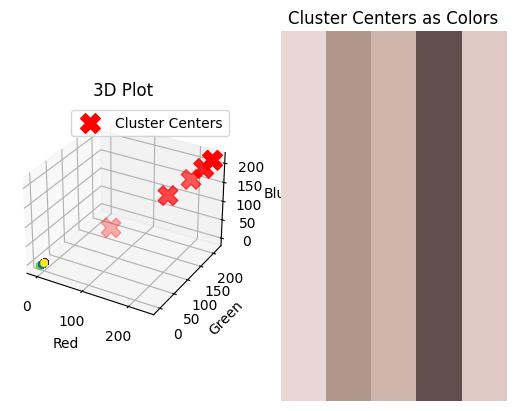

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# color distance
# z-score
# 정규화
